In [3]:
%pip install scikeras

In [4]:
%pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.6 

In [5]:
%pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 25.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.1 which is incompatible.
pycaret 3.3.0 requires pandas<2.2.0, but you have pandas 2.2.1 which is incompatible.


In [6]:
%pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.8 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pycaret
from pycaret.classification import setup, compare_models, evaluate_model

In [2]:
# Load data
df_application = pd.read_csv('./application_record.csv')
df_credit = pd.read_csv('./credit_record.csv')

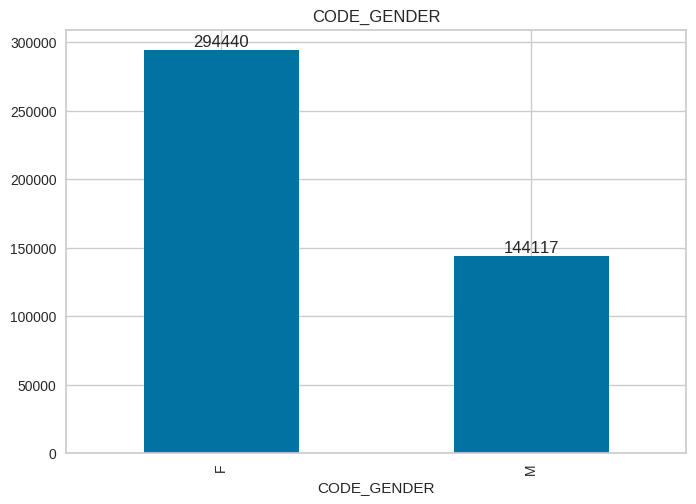

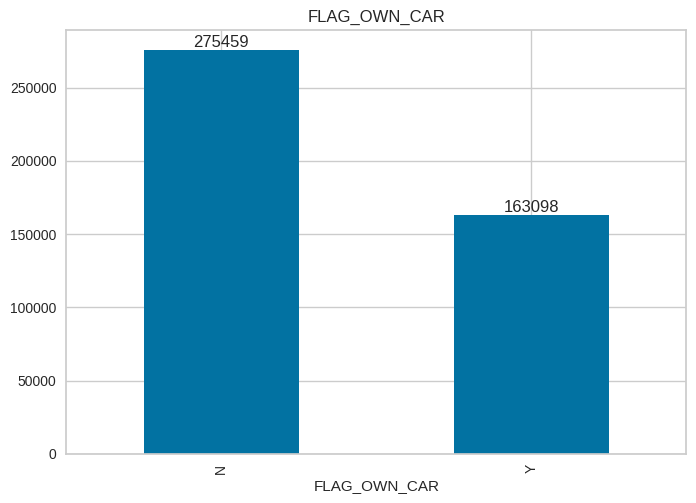

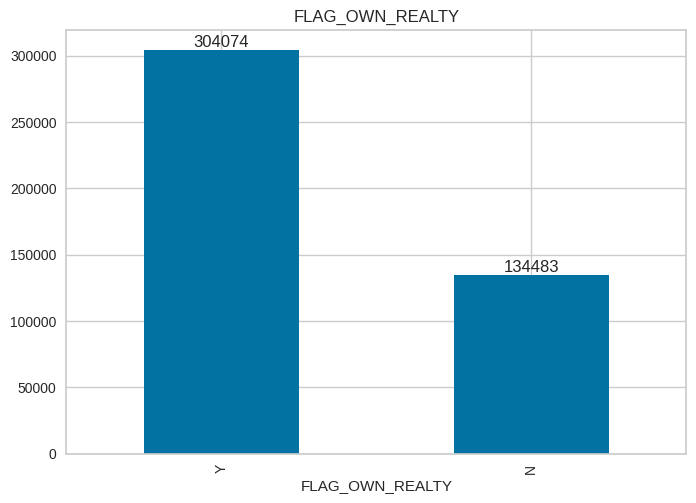

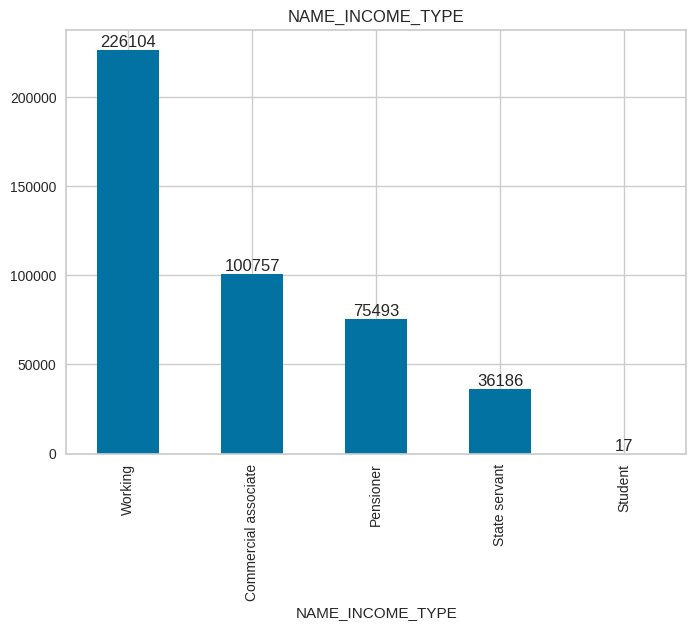

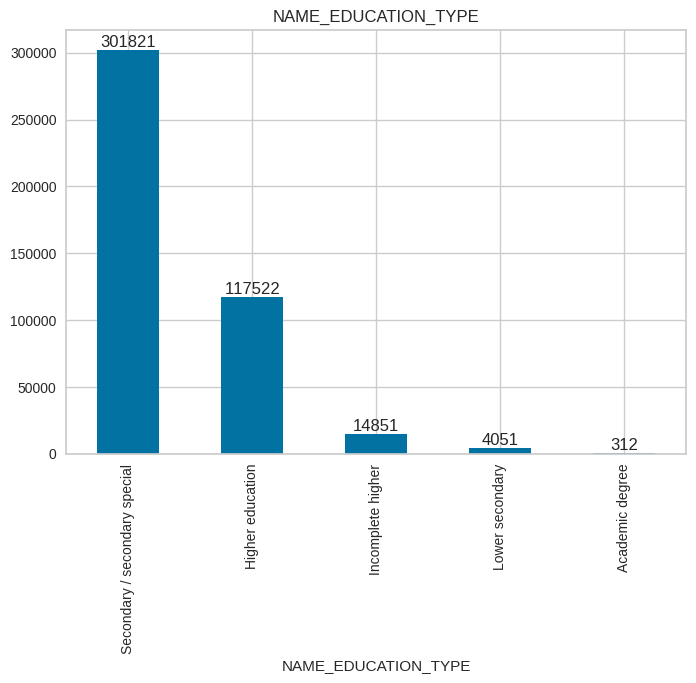

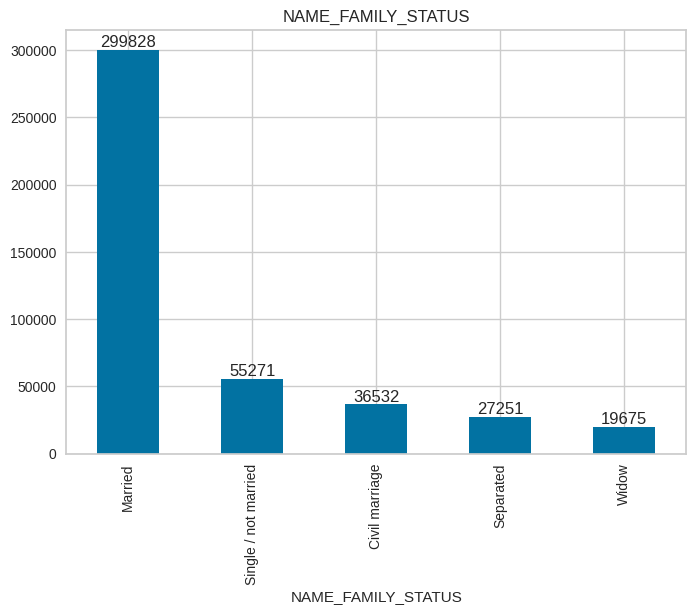

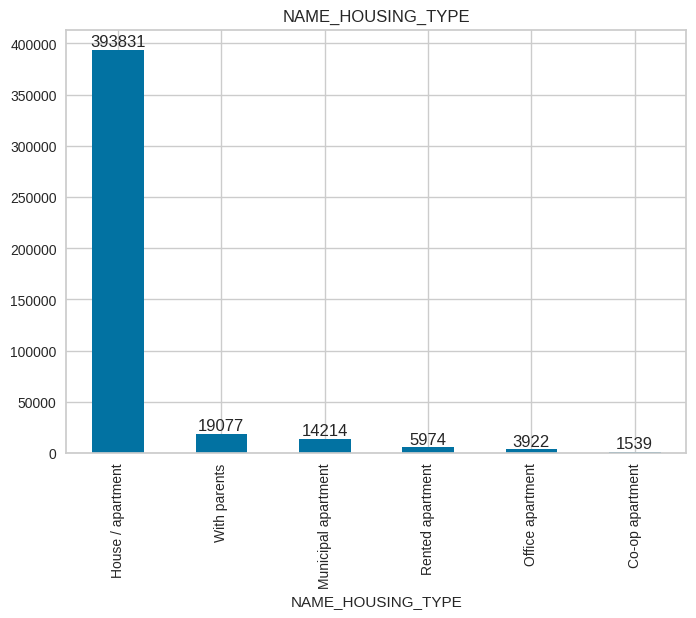

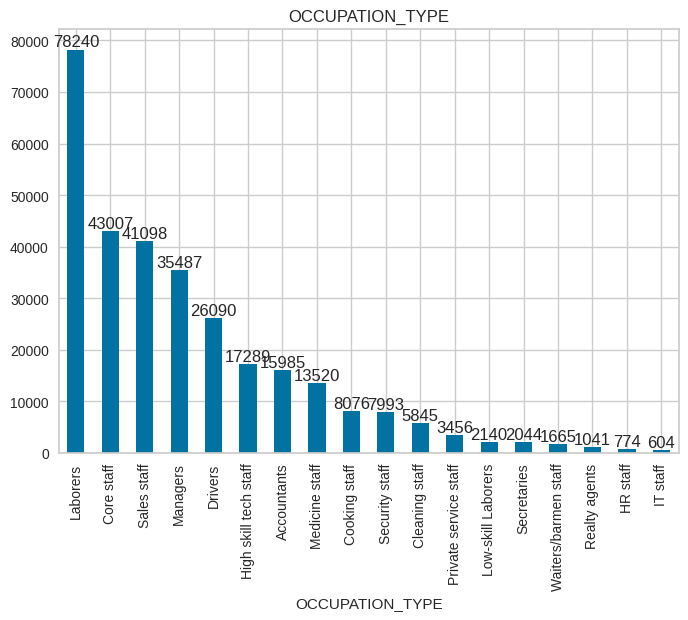

In [3]:
def display_object(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            value_counts = df[column].value_counts()
            ax = value_counts.plot(kind='bar', title=column)
            for i, v in enumerate(value_counts):
                ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
            plt.show()

display_object(df_application)

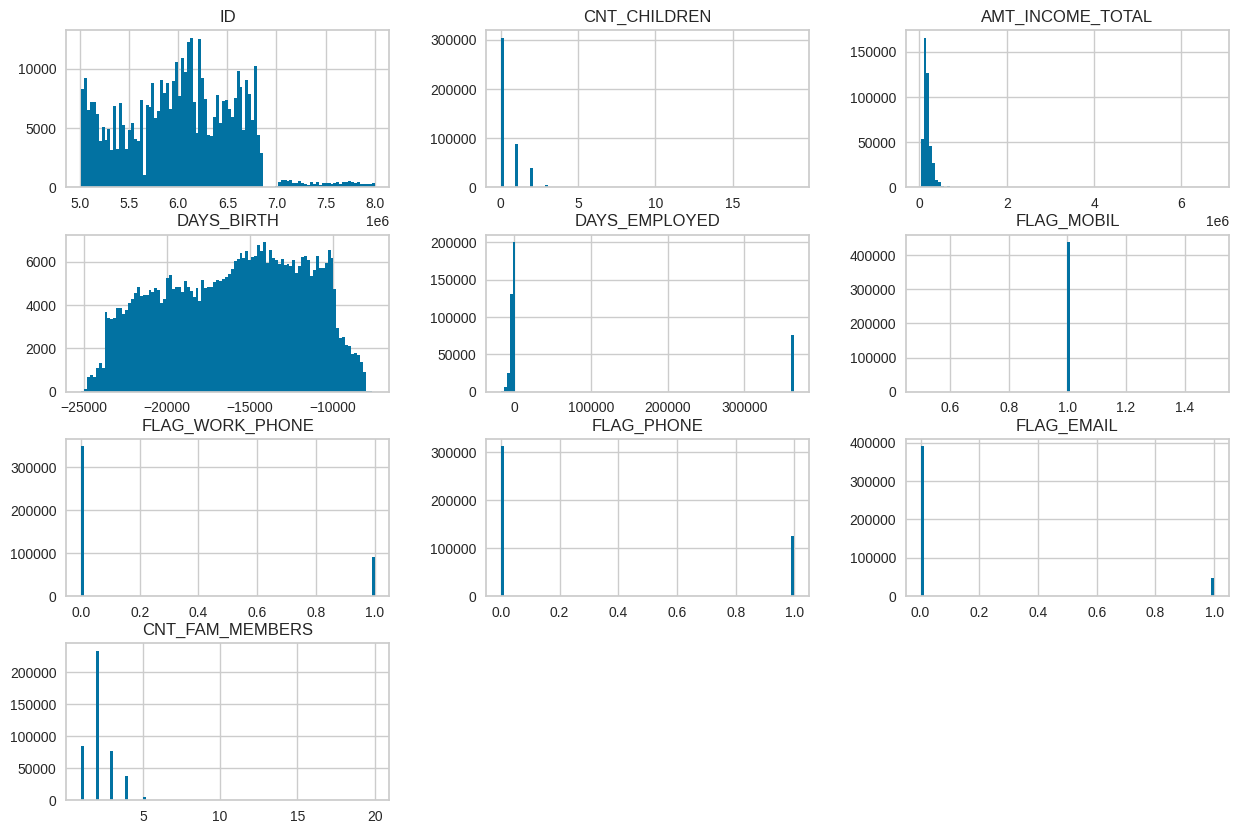

In [4]:
# Generate a histogram for each numeric column
df_application.hist(bins=100,figsize=(15,10))
plt.show()

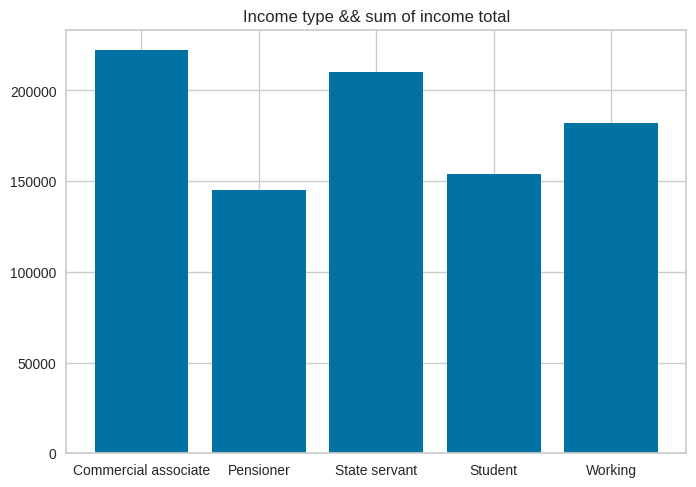

In [5]:
x=['Commercial associate','Pensioner','State servant','Student','Working']
y=[222334,145276,210195,153692,182320]
plt.bar(x,y)
plt.title('Income type && sum of income total')
plt.show()

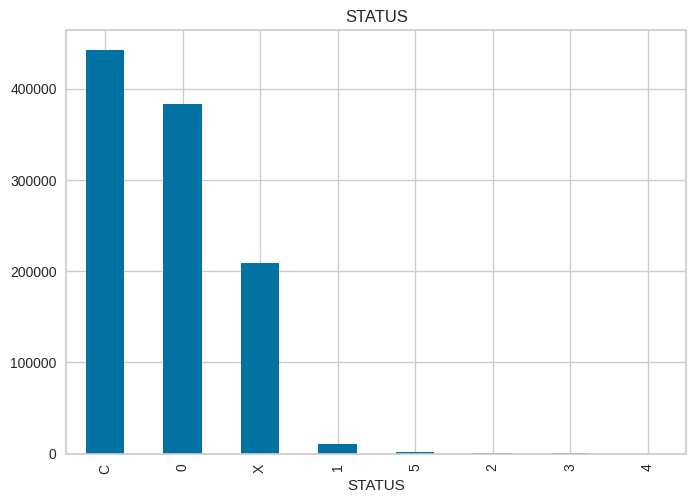

In [6]:
df_credit['STATUS'].value_counts().plot(kind='bar')
plt.title('STATUS')
plt.show()

<Axes: >

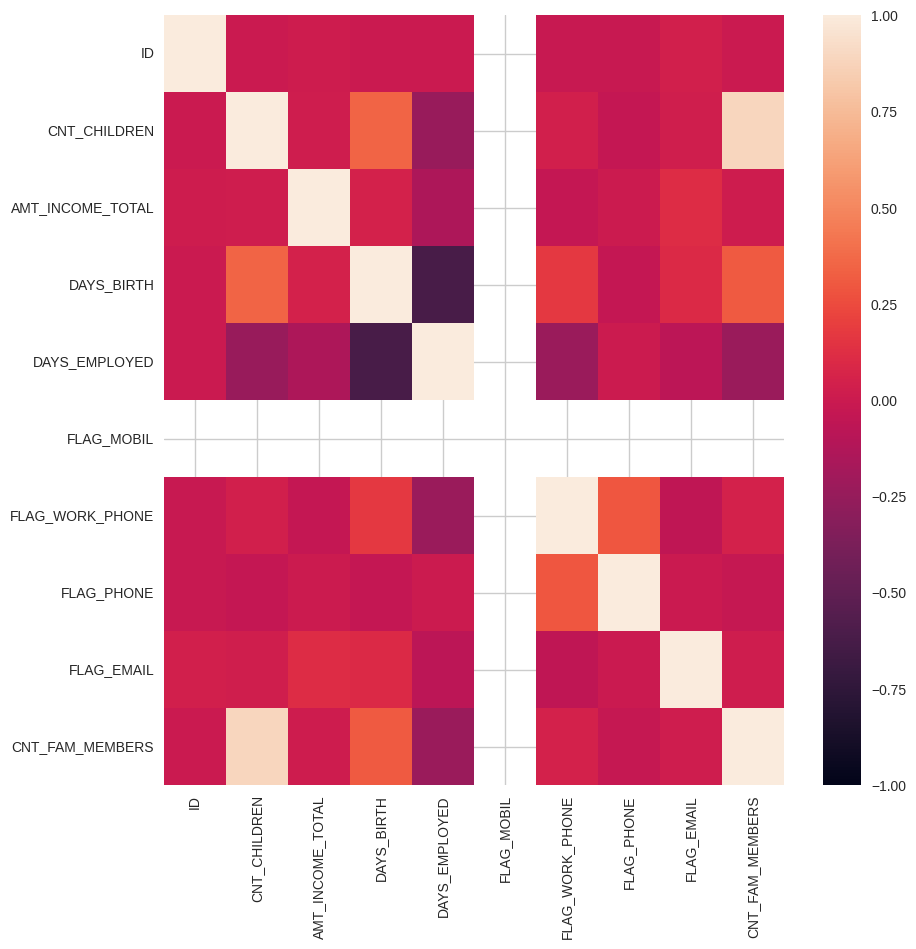

In [7]:
df = pd.merge(df_application, df_credit, on='ID',how='left')

numerical_col=df_application.select_dtypes('number').columns
numerical_coldf=df.select_dtypes('number').columns
plt.figure(figsize=(10,10))
sns.heatmap(df_application[numerical_col].corr(),cmap='rocket',fmt='.2f',vmin=-1,vmax=1)

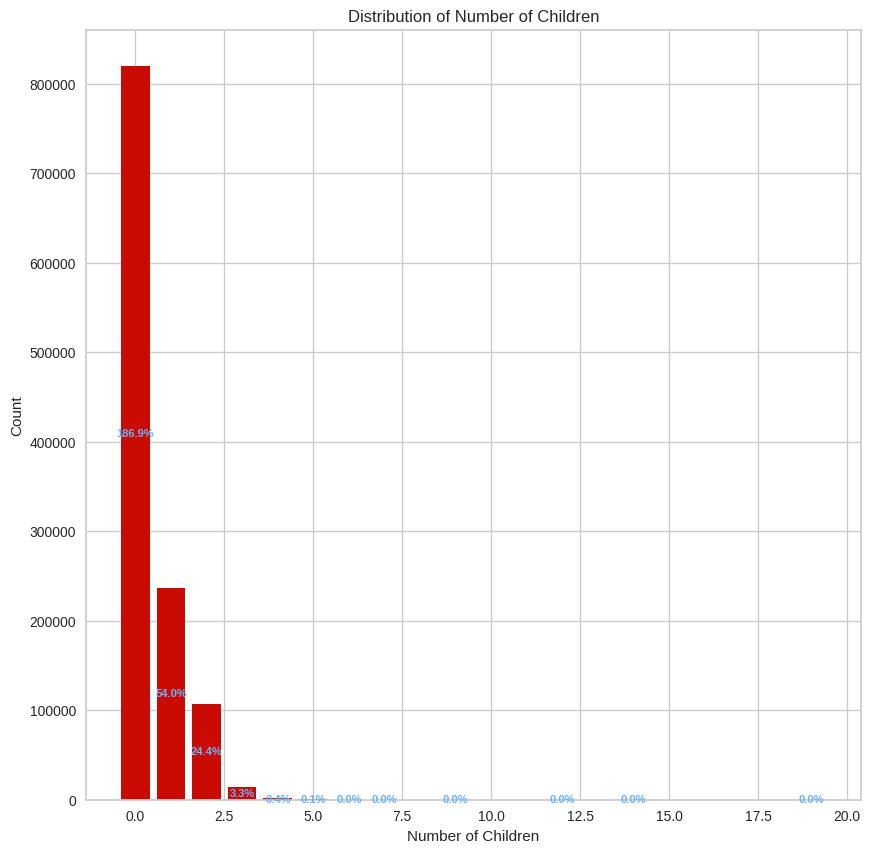

In [8]:
num = df['CNT_CHILDREN'].value_counts().values
label = df['CNT_CHILDREN'].value_counts().index
total = len(df_application)

plt.figure(figsize=(10,10))
ax = plt.bar(label, num, color='r')

# Add bar label
for i, rect in enumerate(ax):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2., height/2, f'{height / total:.1%}',
             ha='center', va='center', fontsize=8, color='#66b3ff', fontweight='bold')

plt.ylabel("Count")
plt.xlabel("Number of Children")
plt.title("Distribution of Number of Children")
plt.show()

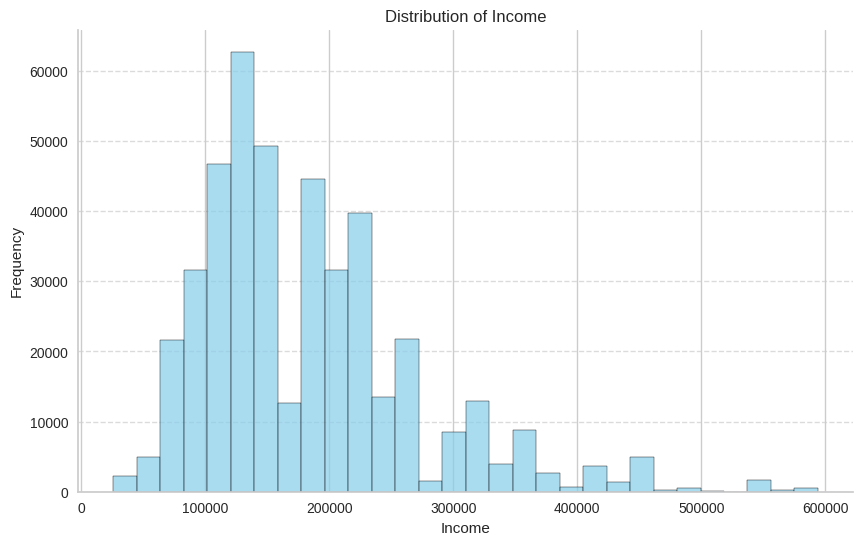

In [9]:
plt.figure(figsize=(10, 6))

ax = sns.histplot(data=df_application[df_application['AMT_INCOME_TOTAL'] <= 600000], x='AMT_INCOME_TOTAL', bins=30,
                  color='skyblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Income')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Income')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

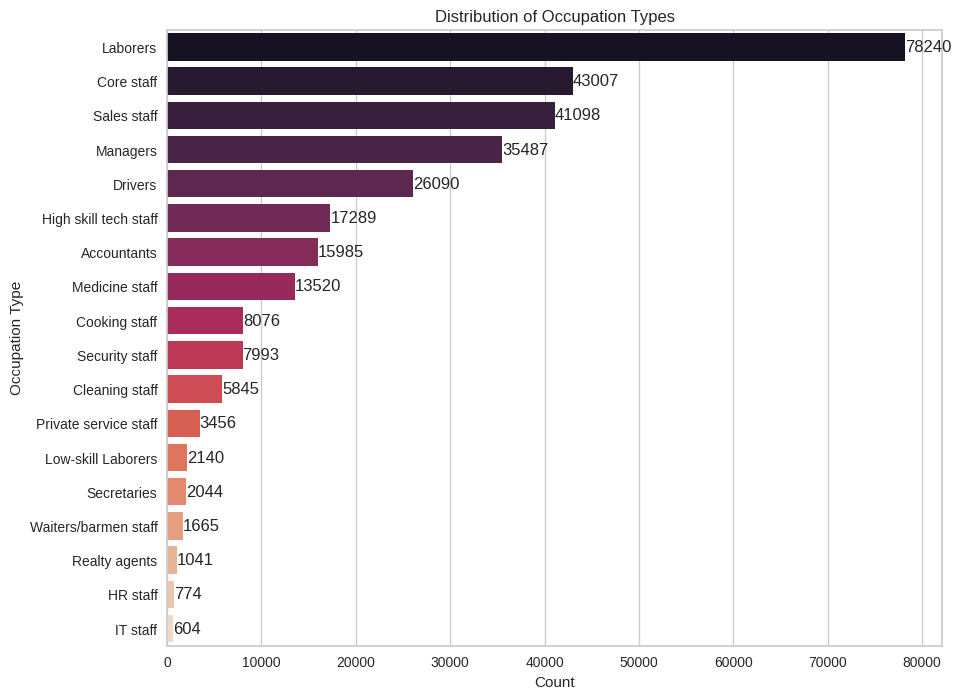

In [10]:
plt.figure(figsize=(10, 8))

sns.countplot(data=df_application,
              y='OCCUPATION_TYPE',
              order=df_application['OCCUPATION_TYPE'].value_counts().index,
              palette='rocket')

ax = plt.gca()

# Add count labels to the right of the bar chart
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2.,
            int(p.get_width()),
            va='center')

# Plot
plt.xlabel('Count')
plt.ylabel('Occupation Type')
plt.title('Distribution of Occupation Types')

plt.show()

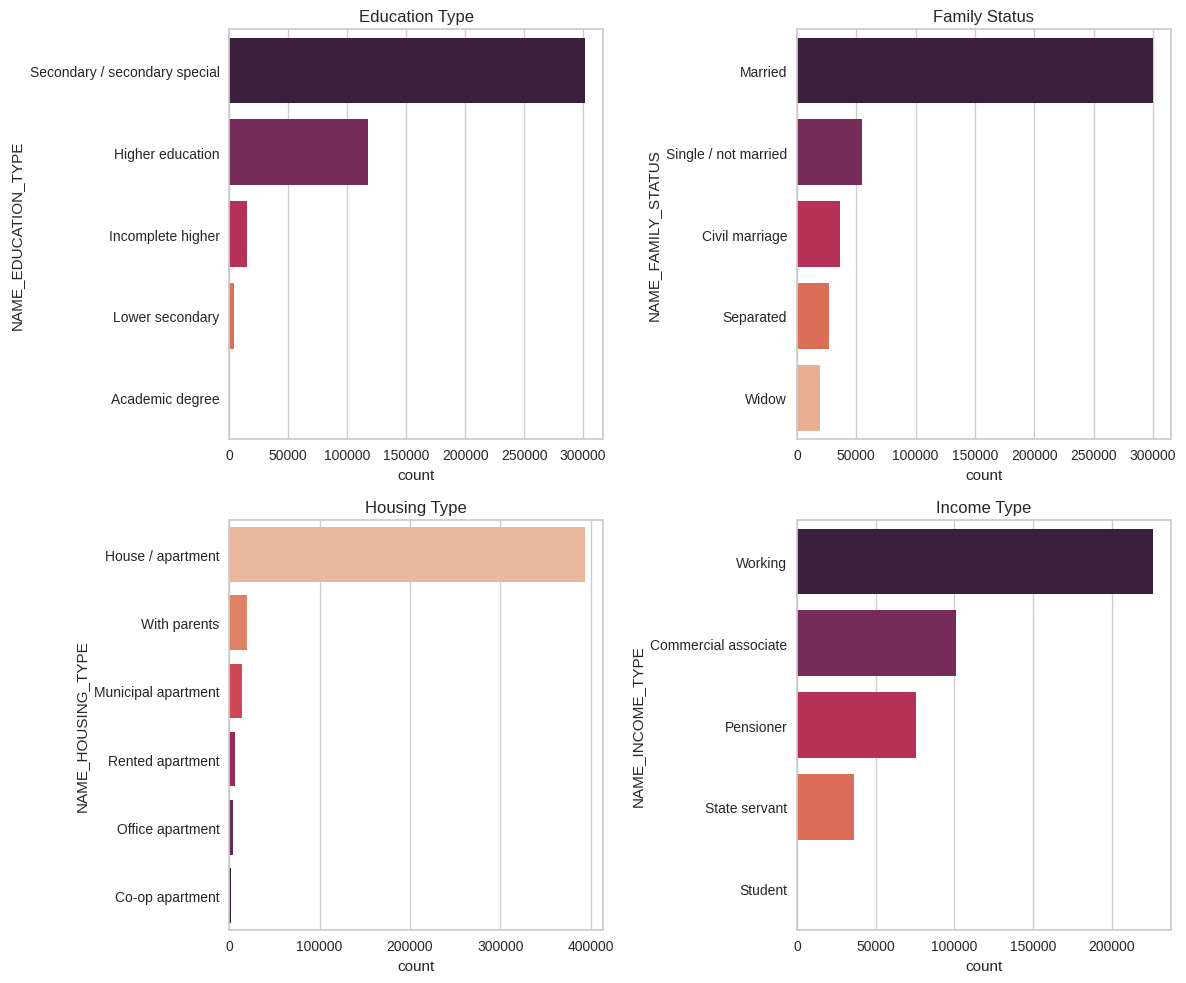

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(data=df_application, y='NAME_EDUCATION_TYPE', order=df_application['NAME_EDUCATION_TYPE'].value_counts().index, ax=axs[0, 0], palette='rocket')
axs[0, 0].set_title('Education Type')

sns.countplot(data=df_application, y='NAME_FAMILY_STATUS', order=df_application['NAME_FAMILY_STATUS'].value_counts().index, ax=axs[0, 1], palette='rocket')
axs[0, 1].set_title('Family Status')

sns.countplot(data=df_application, y='NAME_HOUSING_TYPE', order=df_application['NAME_HOUSING_TYPE'].value_counts().index, ax=axs[1, 0], palette='rocket_r')
axs[1, 0].set_title('Housing Type')

sns.countplot(data=df_application, y='NAME_INCOME_TYPE', order=df_application['NAME_INCOME_TYPE'].value_counts().index, ax=axs[1, 1], palette='rocket')
axs[1, 1].set_title('Income Type')

plt.tight_layout()
plt.show()

In [12]:
# Change F in the 'CODE_GENDER' column to 1 and M to 0
df_application['CODE_GENDER'] = df_application['CODE_GENDER'].map({'F': 1, 'M': 0})

# Change Y in the 'FLAG_OWN_CAR' and 'FLAG_OWN_REALTY' columns to 1 and N to 0
df_application['FLAG_OWN_CAR'] = df_application['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
df_application['FLAG_OWN_REALTY'] = df_application['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

In [13]:
# Find the earliest and latest month for each user
pivot_tb = df_credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
df_credit['MONTHS_BALANCE'] = pd.to_numeric(df_credit['MONTHS_BALANCE'], errors='coerce')
grouped = df_credit.groupby('ID')

pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()
pivot_tb['ID'] = pivot_tb.index
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]

In [14]:
pivot_tb.reset_index(drop = True, inplace = True)

In [15]:
pivot_tb.head()

MONTHS_BALANCE,ID,open_month,end_month
0,5001711,-3,0
1,5001712,-18,0
2,5001713,-21,0
3,5001714,-14,0
4,5001715,-59,0


In [16]:
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month']
# Calculate the length of each user’s credit history
df_credit = pd.merge(df_credit, pivot_tb, on = 'ID', how = 'left')
df_credit.head()

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window
0,5001711,0,X,-3,0,3
1,5001711,-1,0,-3,0,3
2,5001711,-2,0,-3,0,3
3,5001711,-3,0,-3,0,3
4,5001712,0,C,-18,0,18


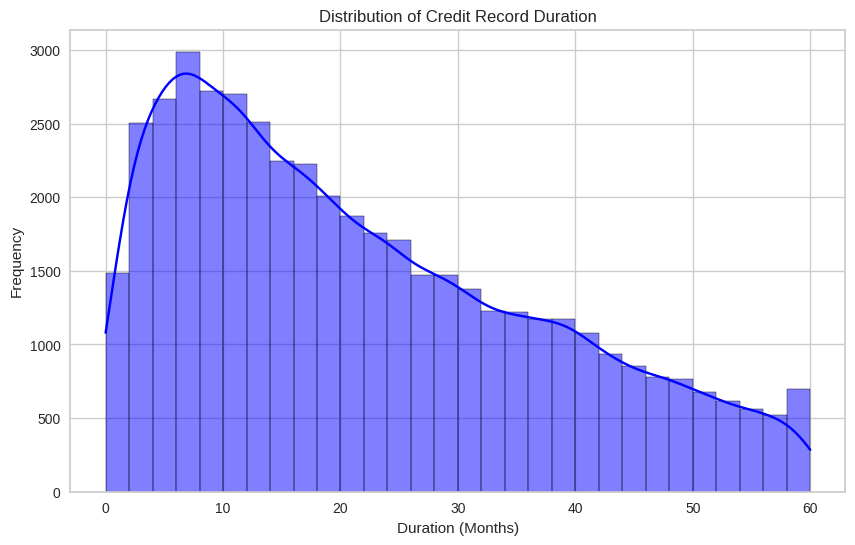

In [17]:
# Histogram of credit history length
plt.figure(figsize=(10, 6))
sns.histplot(data=pivot_tb, x='window', kde=True, bins=30, color='blue')
plt.title('Distribution of Credit Record Duration')
plt.xlabel('Duration (Months)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [18]:
# Define the repayment time of more than 30 days as overdue, and then mark it as 1, otherwise mark it as 0
df_credit['status'] = np.where((df_credit['STATUS'] == '1') | (df_credit['STATUS'] == '2') | (df_credit['STATUS'] == '3' )| (df_credit['STATUS'] == '4' )| (df_credit['STATUS'] == '5'), 1, 0) # analyze > 60 days past due
df_credit['status'] = df_credit['status'].astype(np.int8) # 1: overdue 0: not
# Calculate how long each user has opened an account in each month
df_credit['month_on_book'] = df_credit['MONTHS_BALANCE'] - df_credit['open_month']

df_credit.sort_values(by = ['ID','month_on_book'], inplace = True)
credit = df_credit.copy()
credit.head()

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book
3,5001711,-3,0,-3,0,3,0,0
2,5001711,-2,0,-3,0,3,0,1
1,5001711,-1,0,-3,0,3,0,2
0,5001711,0,X,-3,0,3,0,3
22,5001712,-18,0,-18,0,18,0,0


In [19]:
# Separate two data sets, one is overdue and the other is not overdue
credit['application_status'] = credit.groupby('ID')['status'].transform('max')
truncate = credit.loc[credit['application_status']==1,]
not_trunc = credit.loc[credit['application_status']==0,]
credit.head()

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book,application_status
3,5001711,-3,0,-3,0,3,0,0,0
2,5001711,-2,0,-3,0,3,0,1,0
1,5001711,-1,0,-3,0,3,0,2,0
0,5001711,0,X,-3,0,3,0,3,0
22,5001712,-18,0,-18,0,18,0,0,0


In [20]:
truncate.head()

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book,application_status
180,5001718,-38,X,-38,0,38,0,0,1
179,5001718,-37,0,-38,0,38,0,1,1
178,5001718,-36,0,-38,0,38,0,2,1
177,5001718,-35,0,-38,0,38,0,3,1
176,5001718,-34,0,-38,0,38,0,4,1


In [21]:
dt1 = not_trunc.groupby('ID').agg({
    'month_on_book': ['max'],
    'application_status': ['max']
})
dt1.reset_index(inplace=True)
dt1.columns = ['ID', 'month_on_book', 'application_status']

dt2 = truncate.loc[truncate['status'] == 1].groupby('ID').agg({
    'month_on_book': ['min'],
    'application_status': ['max']
})
dt2.reset_index(inplace=True)
dt2.columns = ['ID', 'month_on_book', 'application_status']

# For users who are not overdue, we take their largest month
# For overdue users, we take the number of months that have passed since they were overdue.

# Concatenate dt1 and dt2 vertically
dt = pd.concat([dt1, dt2], ignore_index=True)

print(dt)

            ID  month_on_book  application_status
0      5001711              3                   0
1      5001712             18                   0
2      5001713             21                   0
3      5001714             14                   0
4      5001715             59                   0
...        ...            ...                 ...
45980  5150412              8                   1
45981  5150417              7                   1
45982  5150459              8                   1
45983  5150463              8                   1
45984  5150464              8                   1

[45985 rows x 3 columns]


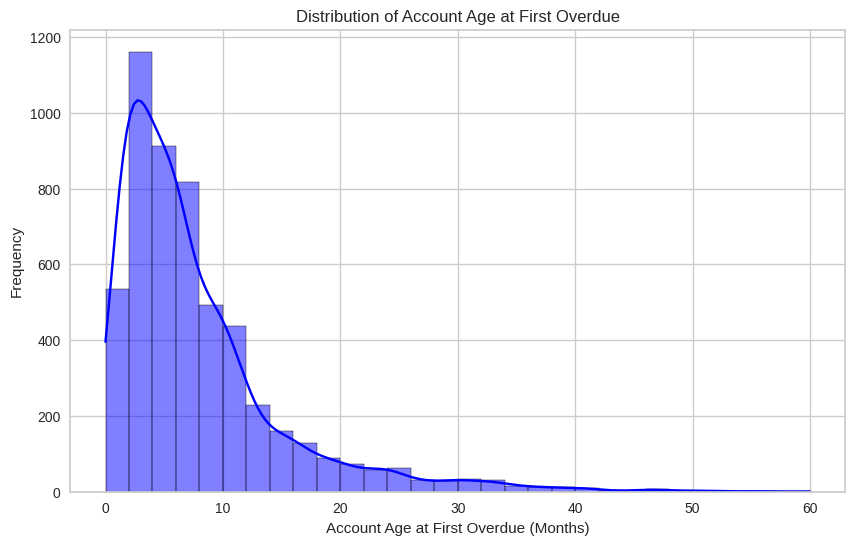

In [22]:
# Distribution chart of first overdue occurrence time
plt.figure(figsize=(10, 6))
sns.histplot(data=dt2, x='month_on_book', bins=30, color='blue', kde=True)
plt.title('Distribution of Account Age at First Overdue')
plt.xlabel('Account Age at First Overdue (Months)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [23]:
print(df_application.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  int64  
 2   FLAG_OWN_CAR         438557 non-null  int64  
 3   FLAG_OWN_REALTY      438557 non-null  int64  
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [24]:
dt = pd.merge(dt, df_application, on = 'ID', how = 'left')
dt.fillna(np.nan,inplace=True)
print(dt)

            ID  month_on_book  application_status  CODE_GENDER  FLAG_OWN_CAR  \
0      5001711              3                   0          NaN           NaN   
1      5001712             18                   0          NaN           NaN   
2      5001713             21                   0          NaN           NaN   
3      5001714             14                   0          NaN           NaN   
4      5001715             59                   0          NaN           NaN   
...        ...            ...                 ...          ...           ...   
45980  5150412              8                   1          1.0           0.0   
45981  5150417              7                   1          1.0           0.0   
45982  5150459              8                   1          1.0           1.0   
45983  5150463              8                   1          1.0           1.0   
45984  5150464              8                   1          1.0           1.0   

       FLAG_OWN_REALTY  CNT_CHILDREN  A

In [25]:
processed= dt.dropna(ignore_index=True)
print(processed)

            ID  month_on_book  application_status  CODE_GENDER  FLAG_OWN_CAR  \
0      5008806             29                   0          0.0           1.0   
1      5008808              4                   0          1.0           0.0   
2      5008809              4                   0          1.0           0.0   
3      5008810             26                   0          1.0           0.0   
4      5008811             38                   0          1.0           0.0   
...        ...            ...                 ...          ...           ...   
25129  5150332              1                   1          0.0           0.0   
25130  5150337              2                   1          0.0           0.0   
25131  5150459              8                   1          1.0           1.0   
25132  5150463              8                   1          1.0           1.0   
25133  5150464              8                   1          1.0           1.0   

       FLAG_OWN_REALTY  CNT_CHILDREN  A

In [26]:
processed.nunique()
# Find which categorical feature columns have how many unique values

ID                     25134
month_on_book             61
application_status         2
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         195
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              5206
DAYS_EMPLOYED           3299
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           10
dtype: int64

In [27]:
processed.dtypes
# Check the data type. The non-numeric data inside needs to be encoded.

ID                       int64
month_on_book            int64
application_status        int8
CODE_GENDER            float64
FLAG_OWN_CAR           float64
FLAG_OWN_REALTY        float64
CNT_CHILDREN           float64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
FLAG_MOBIL             float64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL             float64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [28]:
# Save
processed.to_csv('processed.csv',index=False)

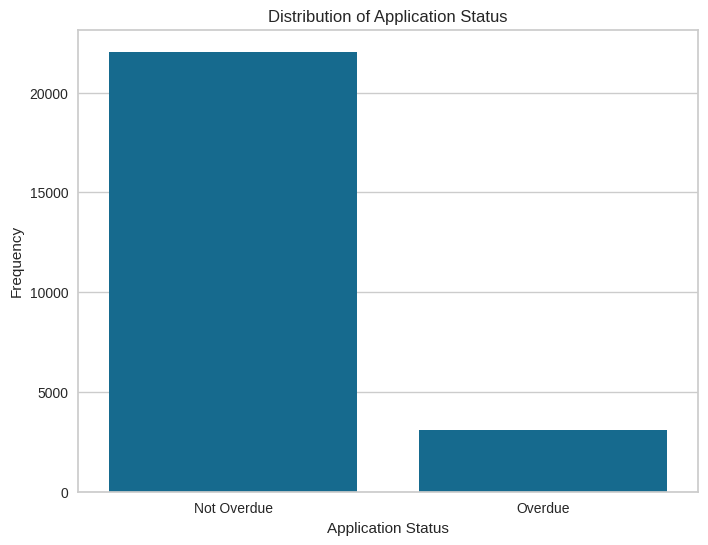

In [29]:
processed = pd.read_csv('processed.csv')

# Create a bar chart of overdue status distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='application_status', data=processed)
plt.title('Distribution of Application Status')
plt.xlabel('Application Status')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Overdue', 'Overdue'])
plt.show()

In [30]:
# Removed columns that are not meaningful for data analysis
data = processed.drop(['ID','FLAG_MOBIL'], axis=1)

In [31]:
data = pd.get_dummies(data,dtype=int)

In [32]:
data.head()

,month_on_book,application_status,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,29,0,0.0,1.0,1.0,0.0,112500.0,-21474.0,-1134.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,4,0,1.0,0.0,1.0,0.0,270000.0,-19110.0,-3051.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,4,0,1.0,0.0,1.0,0.0,270000.0,-19110.0,-3051.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,26,0,1.0,0.0,1.0,0.0,270000.0,-19110.0,-3051.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,38,0,1.0,0.0,1.0,0.0,270000.0,-19110.0,-3051.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
# Undersampling
X_resampled, y_resampled = rus.fit_resample(data.drop('application_status', axis=1), data['application_status'])
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [34]:
# Standardization
X_train_resampled_scaled = StandardScaler().fit_transform(X_train_resampled)
X_test_resampled_scaled = StandardScaler().fit_transform(X_test_resampled)

In [ ]:
# Apply PCA
pca = PCA(n_components=0.95)  # Adjust n_components to retain 95% of variance
X_train_pca = pca.fit_transform(X_train_resampled_scaled)
X_test_pca = pca.transform(X_test_resampled_scaled)

# Reshape data for CNN input
X_train_pca = X_train_pca.reshape(X_train_pca.shape[0], X_train_pca.shape[1], 1)
X_test_pca = X_test_pca.reshape(X_test_pca.shape[0], X_test_pca.shape[1], 1)

In [ ]:
print(X_train_pca.shape)
print(X_test_pca.shape)

In [ ]:
# Remove extra dimensions
X_train_pca = X_train_pca.reshape(X_train_pca.shape[0], -1)
X_test_pca = X_test_pca.reshape(X_test_pca.shape[0], -1)

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train a random forest model on PCA transformed data
rf_clf.fit(X_train_pca, y_train_resampled)

# Predict
y_pred_rf = rf_clf.predict(X_test_pca)

# Evaluate model performance
print("Random Forest Classifier metrics:")
print("Accuracy:", accuracy_score(y_test_resampled, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_resampled, y_pred_rf))
print("F1 Score:", f1_score(y_test_resampled, y_pred_rf, average='macro'))


Random Forest Classifier metrics:
Accuracy: 0.7645631067961165
Confusion Matrix:
 [[479 163]
 [128 466]]
F1 Score: 0.7645370589194168


Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV

# Initialize the AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train
ada_clf.fit(X_train_pca, y_train_resampled)

# Predict
y_pred_ada = ada_clf.predict(X_test_pca)

# Evaluate model performance
print("AdaBoost Classifier metrics:")
print("Accuracy:", accuracy_score(y_test_resampled, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test_resampled, y_pred_ada))
print("F1 Score:", f1_score(y_test_resampled, y_pred_ada))

AdaBoost Classifier metrics:
Accuracy: 0.709546925566343
Confusion Matrix:
 [[421 221]
 [138 456]]
F1 Score: 0.7175452399685287


XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train
xgb_clf.fit(X_train_pca, y_train_resampled)

# Predict
y_pred_xgb = xgb_clf.predict(X_test_pca)

# Evaluate model performance
print("XGBoost Classifier metrics:")
print("Accuracy:", accuracy_score(y_test_resampled, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test_resampled, y_pred_xgb))
print("F1 Score:", f1_score(y_test_resampled, y_pred_xgb))

XGBoost Classifier metrics:
Accuracy: 0.761326860841424
Confusion Matrix:
 [[466 176]
 [119 475]]
F1 Score: 0.7630522088353414


CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV

# Initialize the CatBoost classifier
cat_clf = CatBoostClassifier(iterations=100, random_seed=42, verbose=False)

# Train
cat_clf.fit(X_train_pca, y_train_resampled)

# Predict
y_pred_cat = cat_clf.predict(X_test_pca)

# Evaluate model performance
print("CatBoost Classifier metrics:")
print("Accuracy:", accuracy_score(y_test_resampled, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test_resampled, y_pred_cat))
print("F1 Score:", f1_score(y_test_resampled, y_pred_cat, average='macro'))




CatBoost Classifier metrics:
Accuracy: 0.7435275080906149
Confusion Matrix:
 [[434 208]
 [109 485]]
F1 Score: 0.7430901025837735


MLP

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from keras.callbacks import ProgbarLogger, EarlyStopping

def create_binary_classifier(input_dim, units=64, dropout_rate=0.5, num_layers=2):
    model = Sequential()
    model.add(Dense(units, input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    for _ in range(num_layers - 1):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model





callbacks = [
    ProgbarLogger(count_mode='steps'),
    EarlyStopping(monitor='loss', patience=10)
]

input_dim = X_train_resampled_scaled.shape[1]

# Instantiate the KerasClassifier with the MLP model
mlp_clf = KerasClassifier(
    model=create_binary_classifier,
    model__input_dim=input_dim,
    epochs=10,
    batch_size=32,
    verbose=0,
    callbacks=callbacks
)

# Define parameter grid
param_grid = {
    'model__units': [32, 64],
    'model__dropout_rate': [0.3, 0.5],
    'model__num_layers': [2, 3, 4],
    'batch_size': [32, 64]
}

# Setting up GridSearchCV
grid_mlp = GridSearchCV(estimator=mlp_clf, param_grid=param_grid, n_jobs=1, cv=3, verbose=3, scoring='accuracy')

# Fitting GridSearchCV
grid_result_mlp = grid_mlp.fit(X_train_resampled_scaled, y_train_resampled)

# Outputting results
print("Best: %f using %s" % (grid_result_mlp.best_score_, grid_result_mlp.best_params_))
for params, mean_score, scores in zip(grid_result_mlp.cv_results_['params'], grid_result_mlp.cv_results_['mean_test_score'], grid_result_mlp.cv_results_['std_test_score']):
    print("%f (%f) with: %r" % (mean_score, scores, params))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__units=32;, score=0.708 total time=   5.6s
[CV 2/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__units=32;, score=0.721 total time=   3.7s
[CV 3/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__units=32;, score=0.736 total time=   2.7s
[CV 1/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__units=64;, score=0.726 total time=   3.8s
[CV 2/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__units=64;, score=0.731 total time=   2.8s
[CV 3/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__units=64;, score=0.744 total time=   2.8s
[CV 1/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=3, model__units=32;, score=0.715 total time=   4.0s
[CV 2/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=3, mode

In [41]:
y_pred_mlp = grid_result_mlp.best_estimator_.predict(X_test_resampled_scaled)
print(accuracy_score(y_test_resampled, y_pred_mlp))
print(confusion_matrix(y_test_resampled, y_pred_mlp))
print(f1_score(y_test_resampled, y_pred_mlp))

0.7241100323624595
[[391 251]
 [ 90 504]]
0.7472201630837657


In [42]:
grid_result_mlp.best_params_
# Optimal parameter

{'batch_size': 32,
 'model__dropout_rate': 0.3,
 'model__num_layers': 2,
 'model__units': 64}

CNN

In [ ]:
# Define CNN network
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten, ReLU
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ProgbarLogger, EarlyStopping

def get_cnn_clf(input_shape=(51, 1), num_units=64, dropout_rate=0.5, num_layers=3):
    model = Sequential()
    model.add(Conv1D(num_units, 3, activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling1D(2))
    for _ in range(1, num_layers):
        model.add(Conv1D(num_units, 3, activation='relu', padding='same'))
        model.add(MaxPooling1D(2))
        model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(num_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
callbacks = [
    ProgbarLogger(count_mode='steps'),
    EarlyStopping(monitor='loss', patience=5)
]

# Instantiate the KerasClassifier with the CNN model
clf = KerasClassifier(
    model=get_cnn_clf,
    epochs=10,
    batch_size=32,
    verbose=0,
    callbacks=callbacks
)

param_grid = {
    'model__num_units': [32, 64],
    'model__dropout_rate': [0.3, 0.5],
    'model__num_layers': [2, 3, 4],
    'batch_size': [32, 64]
  # Parameter search range
}


In [ ]:
from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=1, cv=3, verbose=3, scoring='f1')
# Use parameter routing to pass a set of parameters in the grid to the original model
grid_result = grid.fit(X_train_resampled_scaled, y_train_resampled)

# Output
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in zip(grid_result.cv_results_['params'], grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score']):
    print("%f (%f) with: %r" % (mean_score, scores, params))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__num_units=32;, score=0.760 total time=   8.6s
[CV 2/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__num_units=32;, score=0.762 total time=   5.6s
[CV 3/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__num_units=32;, score=0.734 total time=   4.9s
[CV 1/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__num_units=64;, score=0.759 total time=   9.3s
[CV 2/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__num_units=64;, score=0.754 total time=  12.4s
[CV 3/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__num_units=64;, score=0.764 total time=  10.9s
[CV 1/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=3, model__num_units=32;, score=0.756 total time=   7.2s
[CV 2/3] END batch_size=32, model__dropout_rate=0.

In [ ]:
y_pred = grid_result.best_estimator_.predict(X_test_resampled_scaled)
print(accuracy_score(y_test_resampled, y_pred))
print(confusion_matrix(y_test_resampled, y_pred))
print(f1_score(y_test_resampled, y_pred))

0.7144012944983819
[[372 270]
 [ 83 511]]
0.7432727272727273


In [ ]:
grid_result.best_params_
# Optimal parameter

{'batch_size': 64,
 'model__dropout_rate': 0.3,
 'model__num_layers': 4,
 'model__num_units': 64}

RNN

In [35]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.callbacks import ProgbarLogger, EarlyStopping

def get_rnn_clf(input_shape=(51, 1), num_units=32, dropout_rate=0.3, num_layers=4):
    model = Sequential()
    model.add(LSTM(num_units, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    for _ in range(1, num_layers - 1):
        model.add(LSTM(num_units, return_sequences=True))
        model.add(Dropout(dropout_rate))
    model.add(LSTM(num_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [36]:
callbacks = [
    ProgbarLogger(count_mode='steps'),
    EarlyStopping(monitor='loss', patience=5)
]

# Instantiate the KerasClassifier with the RNN model
rnn_clf = KerasClassifier(
    model=get_rnn_clf,
    epochs=15,
    batch_size=64,
    verbose=0,
    callbacks=callbacks
)

# Define parameter grid
param_grid = {
    'model__num_units': [32, 64],
    'model__dropout_rate': [0.3, 0.5],
    'model__num_layers': [2, 3, 4],
    'batch_size': [32, 64]
}

In [37]:
grid_rnn = GridSearchCV(estimator=rnn_clf, param_grid=param_grid, n_jobs=1, cv=3, verbose=3, scoring='accuracy')

# Fit the model
grid_result_rnn = grid_rnn.fit(X_train_resampled_scaled, y_train_resampled)

# Output results
print("Best: %f using %s" % (grid_result_rnn.best_score_, grid_result_rnn.best_params_))
for params, mean_score, scores in zip(grid_result_rnn.cv_results_['params'], grid_result_rnn.cv_results_['mean_test_score'], grid_result_rnn.cv_results_['std_test_score']):
    print("%f (%f) with: %r" % (mean_score, scores, params))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__num_units=32;, score=0.695 total time= 1.6min
[CV 2/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__num_units=32;, score=0.511 total time= 1.1min
[CV 3/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__num_units=32;, score=0.509 total time= 1.5min
[CV 1/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__num_units=64;, score=0.505 total time= 1.5min
[CV 2/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__num_units=64;, score=0.494 total time=  39.3s
[CV 3/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=2, model__num_units=64;, score=0.633 total time= 1.3min
[CV 1/3] END batch_size=32, model__dropout_rate=0.3, model__num_layers=3, model__num_units=32;, score=0.517 total time=  59.5s
[CV 2/3] END batch_size=32, model__dropout_rate=0.

In [38]:
y_pred_rnn = grid_result_rnn.best_estimator_.predict(X_test_resampled_scaled)
print(accuracy_score(y_test_resampled, y_pred_rnn))
print(confusion_matrix(y_test_resampled, y_pred_rnn))
print(f1_score(y_test_resampled, y_pred_rnn))

0.691747572815534
[[313 329]
 [ 52 542]]
0.7399317406143344


In [39]:
grid_result_rnn.best_params_
# Optimal parameter

{'batch_size': 64,
 'model__dropout_rate': 0.5,
 'model__num_layers': 4,
 'model__num_units': 64}